# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the Mars news site
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Parse the HTML
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

# Scrape the table
table = soup.find('table')

# Extract all rows of data
rows = table.find_all('tr')

# Create an empty list to store the row data
data = []

# Loop through the rows
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele]) # Get rid of empty values

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [28]:
# Define the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a DataFrame from the data
df = pd.DataFrame(data[1:], columns=column_names)

# Print the DataFrame to confirm

df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [29]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [30]:
# Confirm type changes were successful by examining data types again

# Change data types for data analysis
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)
print(df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analysing the Data



In [44]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f"There are {num_months} months on Mars.")

There are 12 months on Mars.


In [45]:
# 2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
num_days = df['sol'].nunique()
print(f"There are {num_days} Martian days worth of data in the dataset.")

There are 1867 Martian days worth of data in the dataset.


In [46]:
# 3. What are the coldest and the warmest months on Mars (at the location of Curiosity)?
avg_temp_by_month = df.groupby('month')['min_temp'].mean()
coldest_month = avg_temp_by_month.idxmin()
warmest_month = avg_temp_by_month.idxmax()
print(f"The coldest month on Mars is {coldest_month} and the warmest month is {warmest_month}.")

The coldest month on Mars is 3 and the warmest month is 8.


<Axes: xlabel='month'>

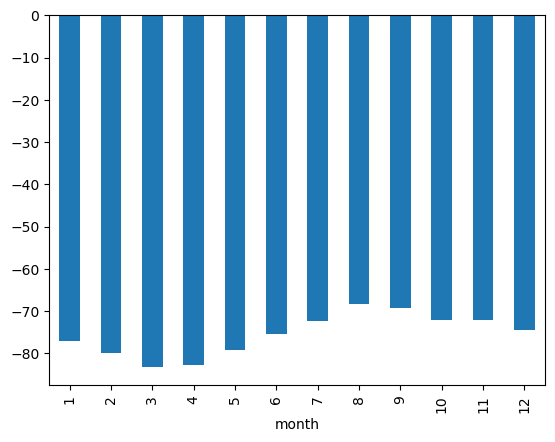

In [48]:
# Plot the results as a bar chart
avg_temp_by_month.plot(kind='bar', title='')

In [49]:
# 4. Which months have the lowest and the highest atmospheric pressure on Mars?
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
lowest_pressure_month = avg_pressure_by_month.idxmin()
highest_pressure_month = avg_pressure_by_month.idxmax()
print(f"The month with the lowest atmospheric pressure on Mars is {lowest_pressure_month} and the month with the highest pressure is {highest_pressure_month}.")

The month with the lowest atmospheric pressure on Mars is 6 and the month with the highest pressure is 9.


<Axes: title={'center': 'Average Pressure by Month'}, xlabel='month'>

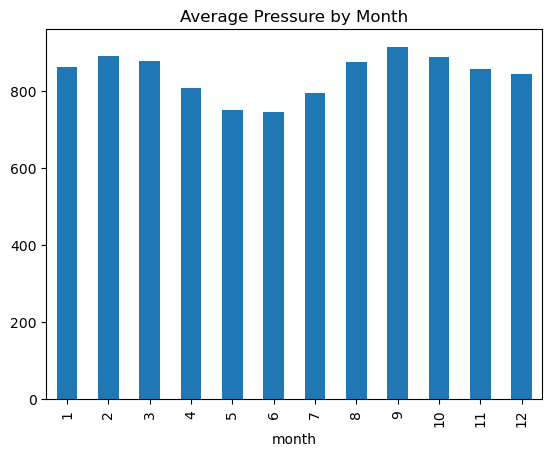

In [50]:
# Plot the results as a bar chart
avg_pressure_by_month.plot(kind='bar', title='Average Pressure by Month')


<Axes: title={'center': 'Daily Min Temperature Over Time'}, xlabel='terrestrial_date'>

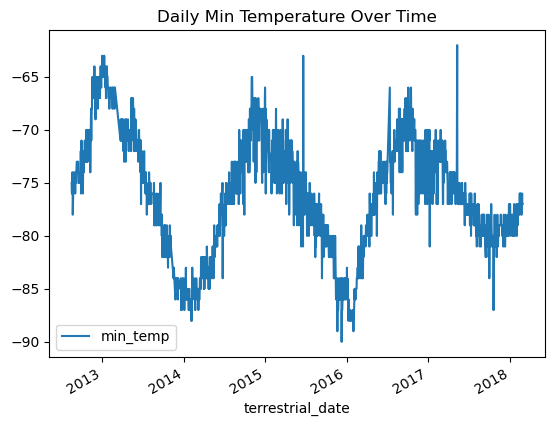

In [51]:
# Plot the daily minimum temperature
df.plot(x='terrestrial_date', y='min_temp', title='Daily Min Temperature Over Time')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [52]:
# Write the data to a CSV
# Export the DataFrame to a CSV file
df.to_csv('mars_weather.csv', index=False)

In [53]:
browser.quit()